In [1]:
import pandas as pd

In [2]:
vehicles = pd.read_csv("../data/vehiculos_original.csv")

In [3]:
vehicles.dtypes

make               object
model              object
year                int64
displ             float64
cylinders         float64
trany              object
drive              object
VClass             object
fuelType           object
comb08              int64
co2TailpipeGpm    float64
dtype: object

In [4]:
vehicles.head()

,make,model,year,displ,cylinders,trany,drive,VClass,fuelType,comb08,co2TailpipeGpm
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500


In [5]:
dict = {'make': 'manufacturer',
        'model': 'model',
        'year': 'year',
       'displ': 'displ',
       'cylinders':'cylinders',
       'trany':'transmission',
       'drive':'drive wheels',
       'VClass': 'Class',
       'fuelType':'fuelType',
       'comb08':'consumption',
       'co2TailpipeGpm': 'CO2 emissions'}
             
vehicles.rename(columns=dict,
          inplace=True)
vehicles.head()

,manufacturer,model,year,displ,cylinders,transmission,drive wheels,Class,fuelType,consumption,CO2 emissions
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500


In [6]:
vehicles.rename({'CO2 emmissions':'CO2 emissions'}, inplace=True)
vehicles.head()

,manufacturer,model,year,displ,cylinders,transmission,drive wheels,Class,fuelType,consumption,CO2 emissions
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500


In [10]:
### Description of entities

# manufacturer
# manufacturer+model
# manufacturer+model+year
# manufacturer+year


In [11]:
vehicles.to_csv("../data/vehicles.1.procesado_inicial_csv", index=False)

In [12]:
#QA of the dataset

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,12) #10 inch wide-lenght for all plots 

## Duplicates
#### At this point, we will try to distinguish:
    · Assure the data consists on those which should be non-duplicated values, are efectively, non-duplicates
    · To check whether the rows coinstains a high number of duplicated values, since they do not provide valuable information
    
Our entities were at the beginning:

    manufacturer
    manufacturer+model
    manufacturer+model+year
    manufacturer+year
From these entities, it should not repet those indicates specified cars(i.e. manufacturer+model+year) 

In [14]:
vehicles['unic_model'] = vehicles.manufacturer.str.cat([vehicles.model, vehicles.year.apply(str)], sep='-')

In [15]:
vehicles.unic_model.value_counts()

Jeep-Cherokee/Wagoneer-1985               24
GMC-C15 Pickup 2WD-1984                   19
Ford-F150 Pickup 2WD-1984                 19
Chevrolet-C10 Pickup 2WD-1984             19
Chevrolet-C10 Pickup 2WD-1985             18
                                          ..
Volvo-S80 AWD-2014                         1
Tesla-Model S AWD - 90D-2015               1
Hyundai-Santa Fe FWD-2017                  1
Roush Performance-F150 Pickup 4WD-2016     1
Chrysler-Sebring FFV-2010                  1
Name: unic_model, Length: 17448, dtype: int64

For this case as example [Chevrolet-C1500 Pickup 2WD-1991] we can appreciate variations on its gear, ciliders, etc. So they are not pure duplicates for us and should be considered in such way.  

In [16]:
vehicles[vehicles.unic_model== 'Chevrolet-C1500 Pickup 2WD-1991'].head()

,manufacturer,model,year,displ,cylinders,transmission,drive wheels,Class,fuelType,consumption,CO2 emissions,unic_model
4957,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4958,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4959,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 5-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4960,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 5-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4961,Chevrolet,C1500 Pickup 2WD,1991,5.0,8.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,15,592.466667,Chevrolet-C1500 Pickup 2WD-1991


Thus, we will only consider as duplicates, those records whose all columns are identical

In [17]:
vehicles[vehicles.duplicated()].shape

(1506, 12)

In [18]:
vehicles = vehicles.drop_duplicates()
vehicles.shape

(36930, 12)

In [19]:
del vehicles['unic_model']

In [20]:
n_records = len(vehicles)
def duplicated_values_col(df):
    for column in df:
        n_by_value = df[column].value_counts()
        most_common = n_by_value.iloc[0]
        less_common = n_by_value.iloc[-1]
        print("{} | {}-{} | {}".format(
            df[column].name,
            round(most_common / (1.0*n_records),3),
            round(less_common / (1.0*n_records),3),
            df[column].dtype
        ))
duplicated_values_col(vehicles)

manufacturer | 0.1-0.0 | object
model | 0.005-0.0 | object
year | 0.038-0.007 | int64
displ | 0.095-0.0 | float64
cylinders | 0.38-0.0 | float64
transmission | 0.287-0.0 | object
drive wheels | 0.353-0.005 | object
Class | 0.145-0.0 | object
fuelType | 0.652-0.0 | object
consumption | 0.097-0.0 | int64
CO2 emissions | 0.084-0.0 | float64


#### The previous data gives us some guidances:
cylinders | 0.38-0.0 | float64 ---> "The 38% of the dataset has the same number of cylinders. And the dtype is a float"

<AxesSubplot:>

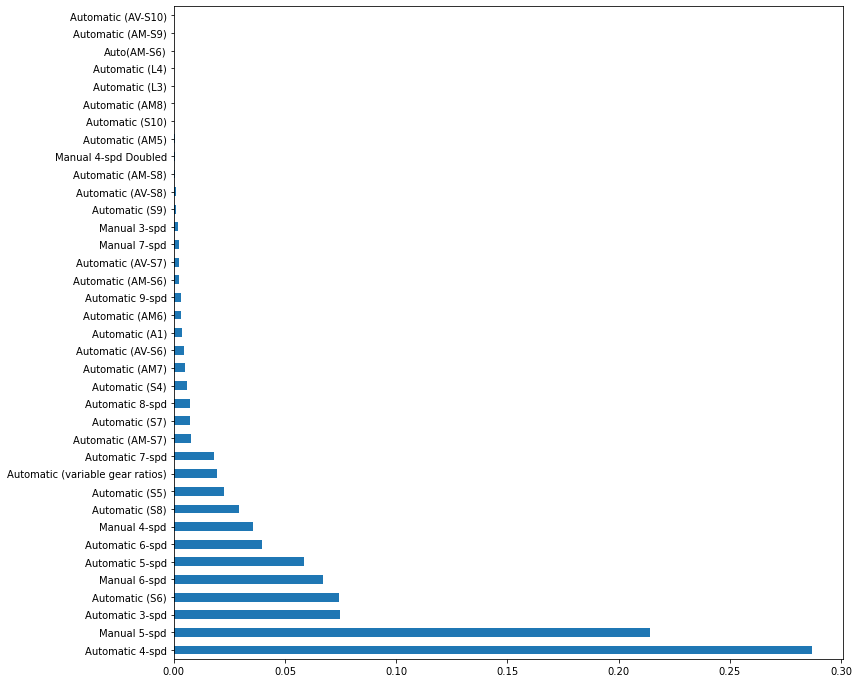

In [21]:
vehicles.transmission.value_counts(normalize=True).plot.barh()

#### There exist two major classes of trany: 4 speed automatic and 5 speed manual 

<AxesSubplot:>

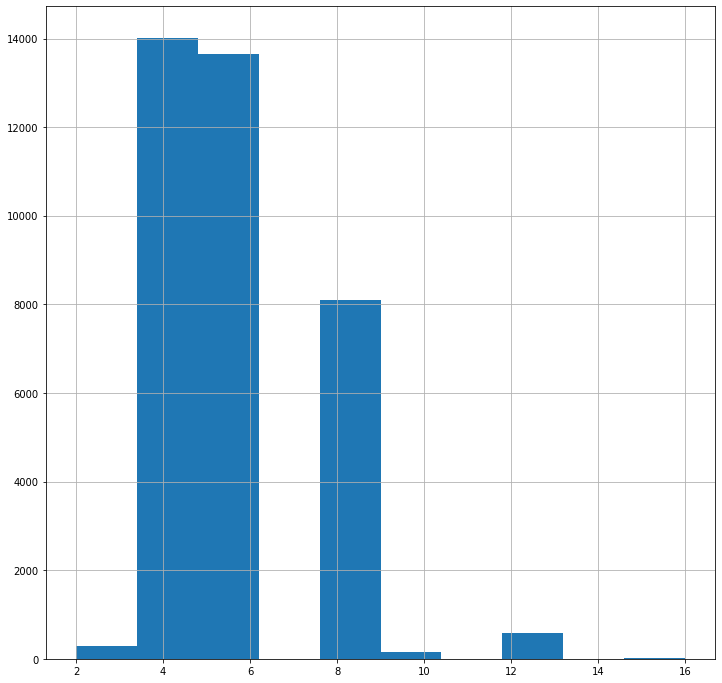

In [22]:
vehicles.cylinders.hist()

#### We can assume there are not major errors within the dataset since the most common values regarding cylinders are 4, 6 and 8

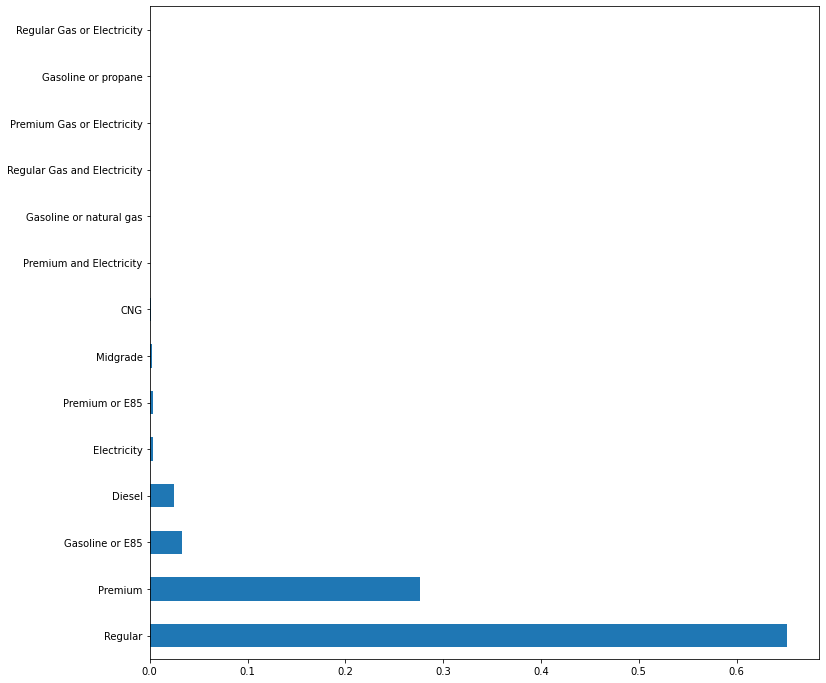

In [23]:
vehicles.fuelType.value_counts(normalize=True).plot.barh();

#### Predictable values for type of fuel, since petrol or gasoline it is widely used. On the contrary, if this dataset was based on Spain, we will appreciate a much higher percentage for diesel   

## Missing Values

### We shall distinguish the validity of null values:
       a - null values which does not exist (i.e: middlename for US names against Spanish names)
       
         b - null values which are from an error (which has been generated from an error in the dataset)

In [24]:
n_records = len(vehicles)
def missing_values_col(df):
    for column in df:
        print("{} | {} | {} ".format(
        df[column].name, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))
missing_values_col(vehicles)

manufacturer | 0.0 | object 
model | 0.0 | object 
year | 0.0 | int64 
displ | 0.0037909558624424585 | float64 
cylinders | 0.003845112374763065 | float64 
transmission | 0.00029786081776333605 | object 
drive wheels | 0.02158137015976171 | object 
Class | 0.0 | object 
fuelType | 0.0 | object 
consumption | 0.0 | int64 
CO2 emissions | 0.0 | float64 


## Outliers

#### We will use the Z score (values higher than 3 are outliers). These values are apread 3 times the standard deviation

In [82]:
import sys
!{sys.executable} -m pip install scipy

In [83]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if vehicles[column].dtype != object:
            n_outliers = len(vehicles[np.abs(stats.zscore(vehicles[column])) > 3])
            print("{} | {} | {}".format(
            df[column].name,
            n_outliers,
            df[column].dtype
        ))
outliers_col(vehicles)

year | 0 | int64
displ | 0 | float64
cylinders | 0 | float64
consumption | 233 | int64
CO2 emmissions | 357 | float64


### We are going to check the outliers 
    comb08 | 233 | -> "There are 233 outliers in regards to fuel consumption"
    BoxPlots: The diagram shows an square (bottom line = first quartile, upper line = third quartile, the green line is the median)

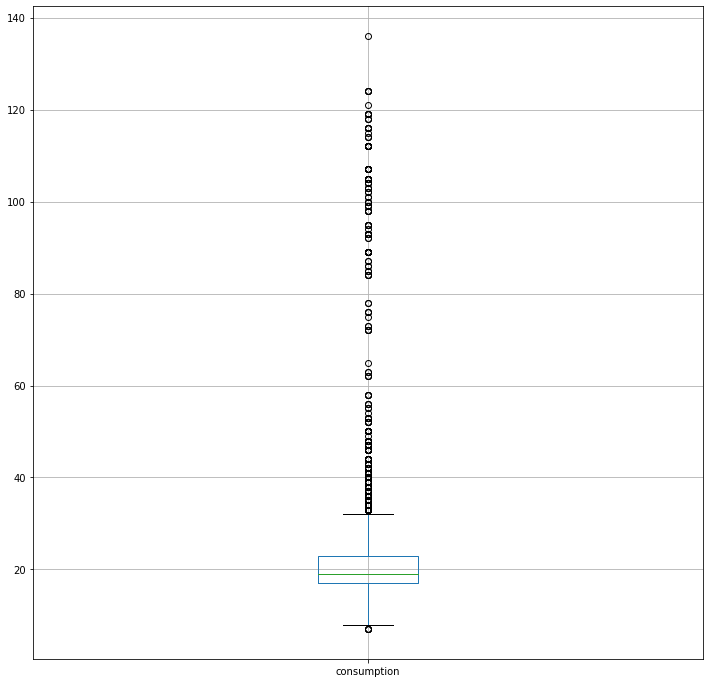

In [84]:
vehicles.boxplot(column="consumption");

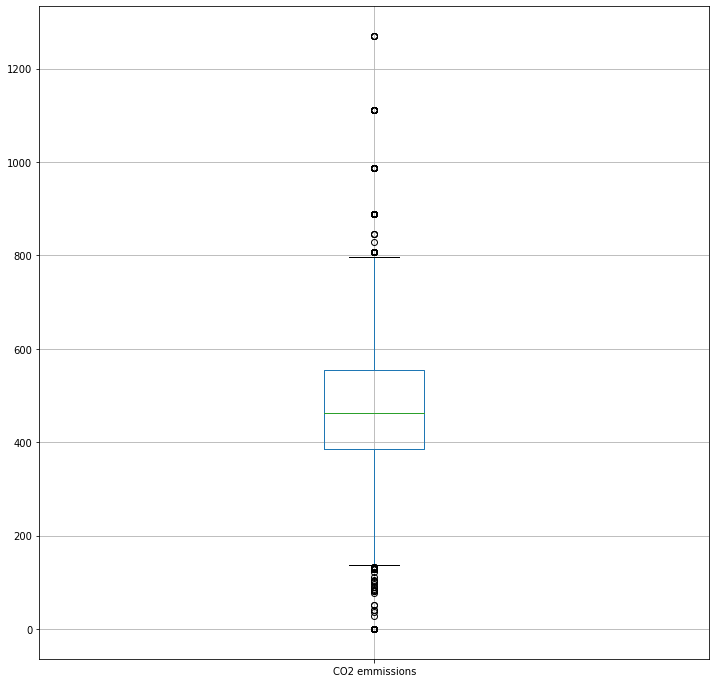

In [92]:
vehicles.boxplot(column="CO2 emmissions");

#### As we are analyzing the CO2 consumption we will discard the electrical vehicles 

In [93]:
vehicles[vehicles.consumption==0].fuelType.unique()

array([], dtype=object)

In [94]:
vehicles.fuelType.unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Electricity', 'Premium Gas or Electricity',
       'Gasoline or E85', 'Gasoline or natural gas', 'CNG',
       'Regular Gas or Electricity', 'Midgrade',
       'Regular Gas and Electricity', 'Gasoline or propane'], dtype=object)

In [95]:
vehicles_non_electrical = vehicles[vehicles.consumption>0]

In [96]:
outliers_col(vehicles_non_electrical)

year | 0 | int64
displ | 0 | float64
cylinders | 0 | float64
consumption | 233 | int64
CO2 emmissions | 357 | float64


In [97]:
duplicated_values_col(vehicles_non_electrical)

manufacturer | 1.0-1.0 | object
model | 0.005-0.0 | object
year | 0.038-0.007 | int64
displ | 0.095-0.0 | float64
cylinders | 0.378-0.0 | float64
transmission | 0.287-0.0 | object
drive wheels | 0.352-0.005 | object
Class | 0.145-0.0 | object
fuelType | 0.651-0.0 | object
consumption | 0.097-0.0 | int64
CO2 emmissions | 0.084-0.0 | float64


#### Conclusion
    · There exist 1506 records duplicated  (we have removed them)
    · The displ, cylinders, trany and drive variables have null values
    · The fuelType variable  has a predominant class (65% of cars use Regular)
    · There is an outlier with year variable for the period of 2018
    · Electrical cars have been removed since they do not contribute to polution emissions

### Exporting the dataset

In [101]:
typo = vehicles['CO2 emmisions']
vehicles['CO2 emmisions'] = typo
vehicles.rename({'CO2 emmisions':'CO2 emissions'}, inplace=True)

In [100]:
vehicles.head()

,manufacturer,model,year,displ,cylinders,transmission,drive wheels,Class,fuelType,consumption,CO2 emmissions
0,manufacturer,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,manufacturer,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,manufacturer,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500
5,manufacturer,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
6,manufacturer,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500


In [98]:
vehicles_non_electrical.to_csv("../data/vehicles.2.clean_analysis.csv", index=False)